# Applying Machine Learning algorithms to MiniBooNE Particle Identification Dataset

## About the dataset:
<ul>
    <li>The dataset has been taken from <a href="https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification">UCI machine learning repository</a> </li>
    <li>It has been taken from the MiniBooNE experiment conducted in the fermilab.</li>
    <li>A stream of muon neutrinos are fired and the detector measures the precense of electron neutrinos(signal) among the muon neutrinos(noise).</li>
    <li>There are 50 features in the dataset related to every detection made , however no information is given about the features.</li>
    <li>There are 130065 instances of data.</li>
    <li>There are no missing values.</li>
    <li>The first line in the file miniboone.txt contains 2 space seperated values , the signal events come first, followed by the background events</li>
    <li>the next 130065 lines contain the value for the 50 features.</li>
    <li>This is a classification problem where we want to tell wether a given signal is a electron neutrino or not.(Binary classification) </li> 
</ul>

## Data pre-processing
<ul>
    <li> The data is stored in miniboone.txt which was downloaded from the above link. </li>
    <li>We use the pandas library to read the data and skip the first row as it contains the number of positive and negative labels</li>
    <li>Then we create a numpy array of 1's(electron neutrino) and 0's(muon neutrino) which acts as our labels for the classification problem.</li>
    <li>We  then convert the input dataframe into a numpy array for the analysis.</li>
    <li>After having a look at the data we see that there are many features having large values. This makes the Machine Learning algorithms difficult to converge to a result. Therefore, we scale(change the range) the data.</li>
    <li>Here, we just want the range to change, not the mean, or the variance so that the data still caries the information it did before scaling. Hence a good scaler to use is the minmax scaler.</li>
    <li>We then use the train test split to split the data into training and test data sets with a default of 75% training data and 25% test data.</li>
    
</ul>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('miniboone.txt',sep=' ',header=None,skiprows=1,skipinitialspace=True)
file=open('miniboone.txt')
y=file.readline()
file.close()
numlabels=[int(s) for s in y.split()]
ylabels=numlabels[0]*[1] + numlabels[1]*[0]
Y=np.array(ylabels)
X=df.to_numpy()
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,random_state=0)

## Evaluating the results
<ul>
    <li>Confusion Matrix
        <p>The confusion matrix is used to quantify how many of the predicted values were correct and incorrect</p>
    </li>
    <li>
        <p>accuracy: The number of true predictions(true 0 and true 1) divided by the total number of predictions made.</p>
    </li>
    <li>
        <p>precision: The number of true 1's divided by the total number of 1's predicted.(Basically telling us that how well have we predicted the 1's) precision=1 if no 1's are predicted as 0 (precision=TP/(TP+FP))</p>
    </li>
    <li>
        <p>recall: The number of true 1's divided by the actual 1's.(the fraction of correctly classified 1's) . recall=1 if no 1s are predicted as 0.(recall=TP/(TP+FN))</p>
    </li>
    <li>
        <p>Reciever Operating Charecterisitcs(ROC) curve: This is a graph where false positive rate is plotted on the X-axis and true positive rate is plotted in the Y axis. The area under the ROC curve is a good measure of how well the algorothm has performed. A score close to 1 is a good auc(area under the curve) score.</p>
    </li>
    
    
</ul>
    

In [3]:
def results(y_test,y_pred,y_pred_proba):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ',metrics.accuracy_score(y_test,y_pred))
    print('precision : ',metrics.precision_score(y_test,y_pred))
    print('recall : ',metrics.recall_score(y_test,y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr,tpr,label='Area under the curve= '+str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')
    

## Logistic regression.
Logistic regression uses the sigmoid function to estimate the probability of an instance being classified as 1.<br>
It best fits the weights and intercepts given to each feature. Here the key parameter to note is the inverse of the regularization strength "C".<br>
The C value controls large values for weights that may lead to overfitting in the data, hence smaller values of C under fit the data by applying penalties on the weights.<br>
Also the value of max_iter (the maximum iterations the optimisation algorithm will go within which if the cost does'nt converge to a global minimum, it would throw an error) has been set to 5000 instead of the default 1000. 

The score for this model is:  0.8730471152663304
the best value of parameter C is:  {'C': 100}
The confusion matrix for the given model is: 
[[22187  1265]
 [ 2863  6201]]
accuracy :  0.8730471152663304
precision :  0.830565229038307
recall :  0.684135039717564


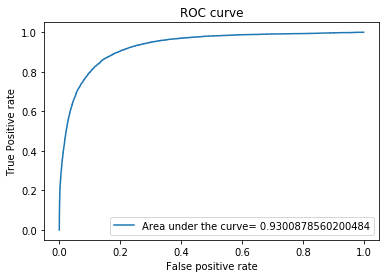

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=5000)
C_range={'C':[100]}
clf=GridSearchCV(lr,C_range).fit(X_train,y_train)
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameter C is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]
results(y_test,y_pred,y_pred_proba)

## K nearest Neigbhors

The K-nearest neighbors model does not actually train a model based on the data but rather stores all the training data given to it and then calculates the distance of each point from every other point.When test data is given, it classifies it as a 1 or 0 based on votes based on the chosen k(number of nearest neighbors).<br>
The key parameters are the number of neighbors chosen to be considered for voting. If the number of neighbors are less then the model is highly sensitive to noise(False data) and the model overfits(very complex decision boundaries). Larger K implies simpler(less detailed decision boundaries)<br>

The score for this model is:  0.8901463894697995
the best value of parameters is:  {'n_neighbors': 14}
The confusion matrix for the given model is: 
[[21821  1631]
 [ 1941  7123]]
accuracy :  0.8901463894697995
precision :  0.8136851724925748
recall :  0.785856134157105


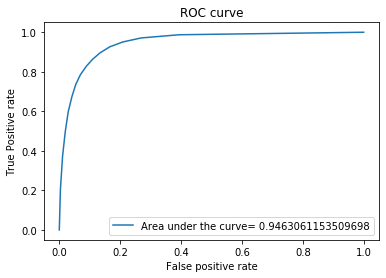

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':[1,5,10,14]}
clf=GridSearchCV(knn,parameters_knn).fit(X_train,y_train)
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]
results(y_test,y_pred,y_pred_proba)

## Decision tree
Decision tress is a simple binary tree which classifies the information as 1 or 0 by simply comparing features with a constant at every node. The model can overfit if no limit is specified on the depth the tree can go to.

The score for this model is:  0.908691105917087
the best value of parameters is:  {'max_depth': 10}
The confusion matrix for the given model is: 
[[21902  1550]
 [ 1419  7645]]
accuracy :  0.908691105917087
precision :  0.8314301250679718
recall :  0.8434466019417476


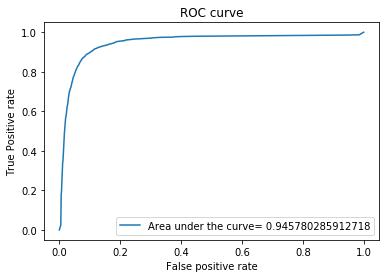

In [6]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
parameters_dt={'max_depth':[5,10,15]}
clf=GridSearchCV(dt,parameters_dt).fit(X_train,y_train)
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]
results(y_test,y_pred,y_pred_proba)

## Random Forest
A random forest is created by building an ensemble of decision trees , each using  a subset of the dataset for training .
The final result is the average of all the decision trees.<br>
a lot of parameters controll the modelling here.<br>


The score for this model is:  0.9240681510640916
the best value of parameters is:  {'max_depth': 10, 'max_samples': 40000, 'n_estimators': 100}
The confusion matrix for the given model is: 
[[22343  1109]
 [ 1360  7704]]
accuracy :  0.9240681510640916
precision :  0.874163168047203
recall :  0.8499558693733451


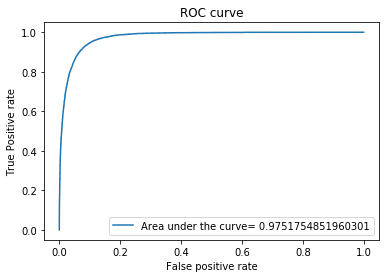

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True)
parameters_rf={'n_estimators':[10,50,100],'max_depth':[5,10],'max_samples':[30000,40000]}
clf=GridSearchCV(rf,parameters_rf).fit(X_train,y_train)
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]
results(y_test,y_pred,y_pred_proba)